In [1]:
import numpy as np
import matplotlib.pyplot as plt
import re

%matplotlib inline

In [2]:
def parse_erdos_throughput(filename):
    with open(filename) as f:
        log = f.read()
    msg_size_lines = re.findall("Received [0-9]+ messages of size [0-9]+", log)
    msg_sizes = [int(re.findall("(?<=size )[0-9]+", s)[0]) for s in msg_size_lines]
    throughputs = list(map(float, re.findall("(?<=Receive throughput: )[0-9\.]+(?= B/s)", log)))
    
    return msg_sizes[:len(throughputs)], throughputs

In [3]:
cb_x, cb_y = parse_erdos_throughput("/home/peter/Downloads/results.out")
pull_x, pull_y = parse_erdos_throughput("/home/peter/Downloads/results_throughput_pull_op.out")

assert len(cb_x) == len(cb_y)
assert len(pull_x) == len(pull_y)

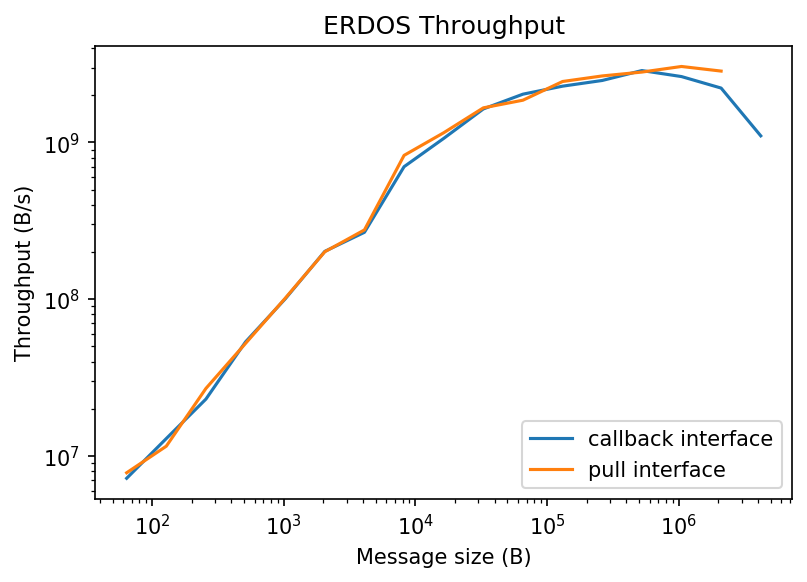

In [4]:
plt.rcParams['figure.dpi'] = 150

plt.title("ERDOS Throughput")
plt.xlabel("Message size (B)")
plt.ylabel("Throughput (B/s)")

plt.loglog(cb_x, cb_y, label="callback interface")
plt.loglog(pull_x, pull_y, label="pull interface")

plt.legend(loc="lower right")

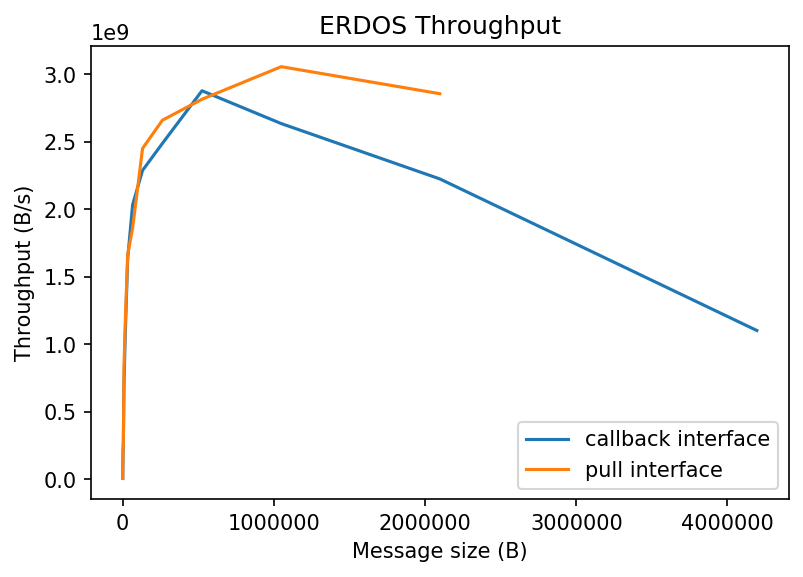

In [5]:
plt.rcParams['figure.dpi'] = 150

plt.title("ERDOS Throughput")
plt.xlabel("Message size (B)")
plt.ylabel("Throughput (B/s)")

plt.plot(cb_x, cb_y, label="callback interface")
plt.plot(pull_x, pull_y, label="pull interface")

plt.legend(loc="lower right")